# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [13]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

import nsfg
import first

# we are going to replace the purpose build chariting for more general libaries
#import thinkstats2
#import thinkplot

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline


Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

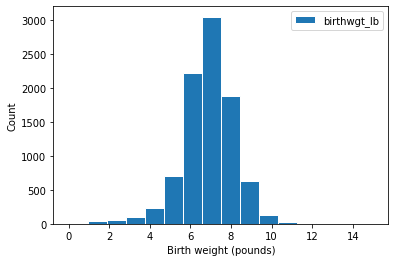

In [6]:
plt.hist(x=live.birthwgt_lb, label='birthwgt_lb', bins=16, edgecolor='w')
plt.xlabel('Birth weight (pounds)')
plt.ylabel('Count')
plt.legend()
plt.show()

To normalize the distribution, we could divide through by the total count:

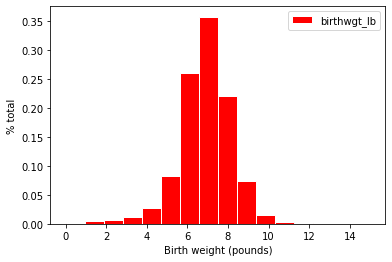

In [9]:
plt.hist(x=live.birthwgt_lb, label='birthwgt_lb', 
         bins=16, edgecolor='w', density=True, color='red'
        )
plt.xlabel('Birth weight (pounds)')
plt.ylabel('% total')
plt.legend()
plt.show()

In [33]:
def pmf(rng):    
    """quick formula to return value of distribution"""
    dct = Counter(sorted(rng))
    return {i: (dct[i] / len(rng)) for i in dct}
    

brihweight_pmf = pmf(live.birthwgt_lb.dropna().astype(int))

pmf_ex = pmf([1,2,2,3,5])
pmf_ex[2]

0.4

Here's the PMF of pregnancy length for live births.

In [41]:
pmf2 = pmf(live.prglngth)
pmf2

{0: 0.00010931351114997814,
 4: 0.00010931351114997814,
 9: 0.00010931351114997814,
 13: 0.00010931351114997814,
 17: 0.00021862702229995628,
 18: 0.00010931351114997814,
 19: 0.00010931351114997814,
 20: 0.00010931351114997814,
 21: 0.00021862702229995628,
 22: 0.000765194578049847,
 23: 0.00010931351114997814,
 24: 0.0014210756449497158,
 25: 0.00032794053344993443,
 26: 0.003825972890249235,
 27: 0.00032794053344993443,
 28: 0.0034980323567993005,
 29: 0.002295583734149541,
 30: 0.015085264538696982,
 31: 0.0029514648010494095,
 32: 0.012571053782247486,
 33: 0.005356362046348929,
 34: 0.006558810668998688,
 35: 0.0339965019676432,
 36: 0.035089637079142984,
 37: 0.049737647573240056,
 38: 0.06635330126803674,
 39: 0.5130083078268474,
 40: 0.1219938784433756,
 41: 0.06416703104503717,
 42: 0.03585483165719283,
 43: 0.016178399650196764,
 44: 0.005028421512898994,
 45: 0.0010931351114997813,
 46: 0.00010931351114997814,
 47: 0.00010931351114997814,
 48: 0.000765194578049847,
 50: 0.0

Here's what it looks like plotted with `Hist`, which makes a bar graph.

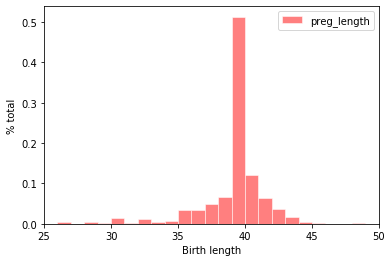

In [50]:
plt.hist(x=live.prglngth, label='preg_length', 
         bins=50, edgecolor='w', density=True, color='red', alpha=0.5
        )
plt.xlabel('Birth length')
plt.ylabel('% total')
plt.legend()
plt.xlim((25,50))
plt.show()


Here's what it looks like plotted with `Pmf`, which makes a step function.

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [51]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [92]:
first_pmf = pmf(firsts.prglngth)
other_pmf = pmf(others.prglngth)

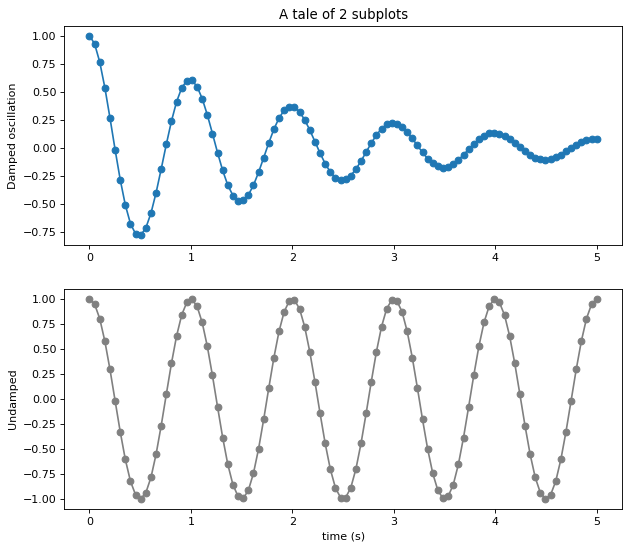

In [90]:
# Here is an example of how we can use subplots to line up mutiple matplotlib plots
x1 = np.linspace(0.0, 5.0, 100)
x2 = np.linspace(0.0, 5.0, 100)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1* 0.5)
y2 = np.cos(2 * np.pi * x2)

# This is some extra stuff to make the figure size bigger
fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'o-', color='grey')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [83]:
plt.figure?

And here's the code that replicates one of the figures in the chapter.

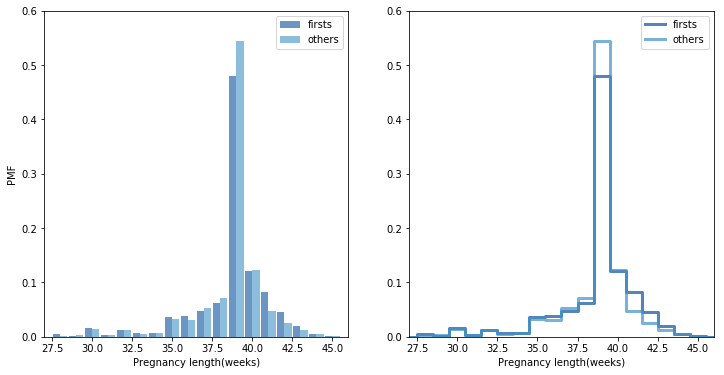

In [18]:
# ok lets plot two histograms lhs grouped columns rhs overlap with just outlines

# lets figure this out here in a bit
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)



Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

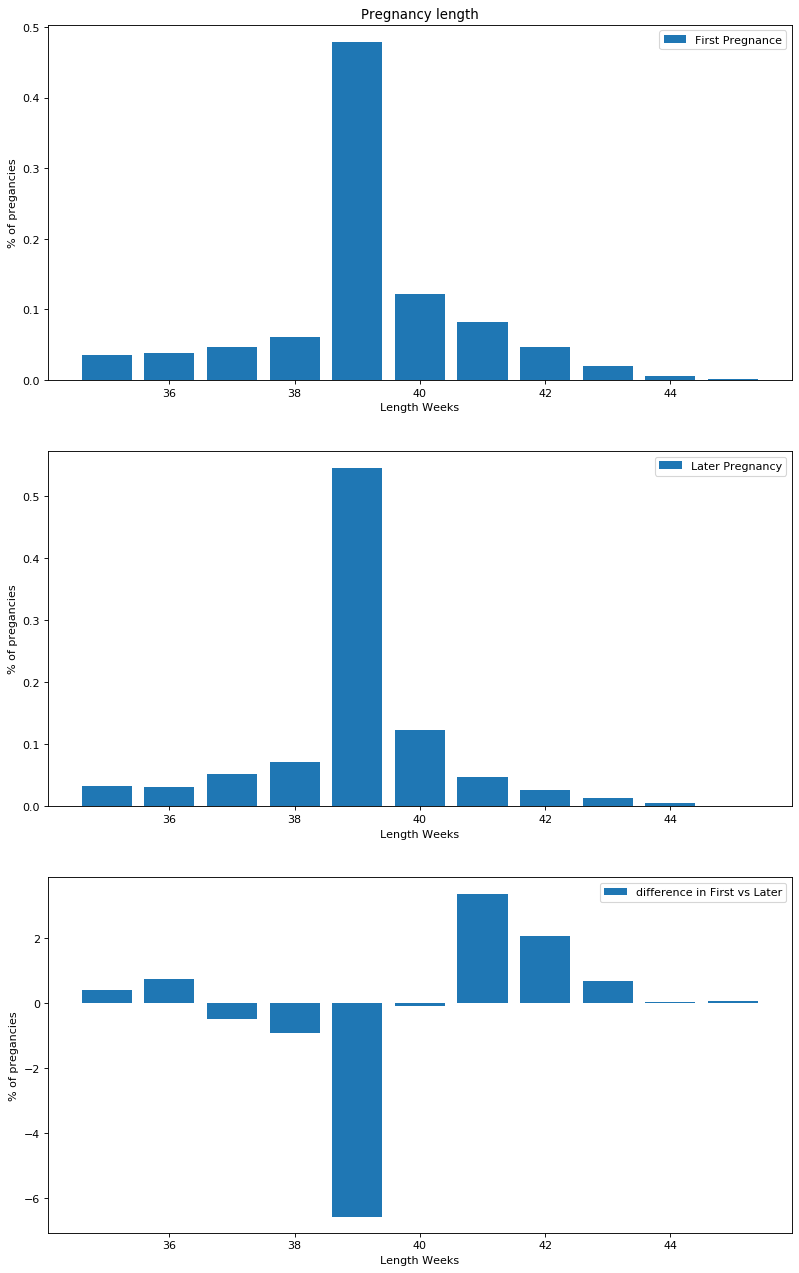

In [109]:
weeks = range(35, 46)
diffs = []

p1 = []
p2 = []

for week in weeks:
    p1.append(first_pmf[week])
    p2.append(other_pmf[week])
    

p1 = np.array(p1)
p2 = np.array(p2)
diff = 100 * (p1 - p2)



fig = plt.figure(figsize=(12, 20), dpi= 80, facecolor='w', edgecolor='k')

# first figure
plt.subplot(3,1,1)    
plt.bar(weeks, p1, label='First Pregnance')
plt.ylabel('% of pregancies')
plt.xlabel('Length Weeks')
plt.title('Pregnancy length')
plt.legend()

# second figure
plt.subplot(3,1,2)
plt.bar(weeks, p2, label='Later Pregnancy')
plt.ylabel('% of pregancies')
plt.xlabel('Length Weeks')
plt.legend()

# third figure
plt.subplot(3,1,3)
plt.bar(weeks, diff, label='difference in First vs Later')
plt.ylabel('% of pregancies')
plt.xlabel('Length Weeks')
plt.legend()



plt.show()


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [20]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [21]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

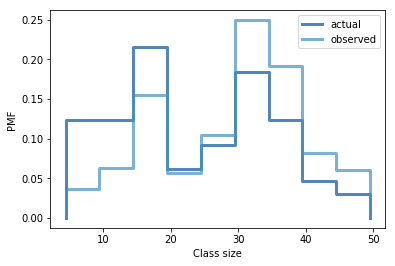

In [22]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [23]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [24]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [25]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

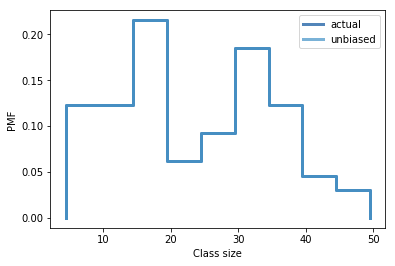

In [26]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [27]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.561571,-1.532238
1,0.651842,-1.748935
2,0.013494,0.846343
3,0.155800,-1.018079


We can specify column names when we create the DataFrame:

In [28]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.561571,-1.532238
1,0.651842,-1.748935
2,0.013494,0.846343
3,0.155800,-1.018079


We can also specify an index that contains labels for the rows.

In [29]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.561571,-1.532238
b,0.651842,-1.748935
c,0.013494,0.846343
d,0.155800,-1.018079


Normal indexing selects columns.

In [30]:
df['A']

a    0.561571
b    0.651842
c    0.013494
d    0.155800
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [31]:
df.loc['a']

A    0.561571
B   -1.532238
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [32]:
df.iloc[0]

A    0.561571
B   -1.532238
Name: a, dtype: float64

`loc` can also take a list of labels.

In [33]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.561571,-1.532238
c,0.013494,0.846343


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [34]:
df['a':'c']

,A,B
a,0.561571,-1.532238
b,0.651842,-1.748935
c,0.013494,0.846343


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [35]:
df[0:2]

,A,B
a,0.561571,-1.532238
b,0.651842,-1.748935


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [36]:
resp = nsfg.ReadFemResp()

In [37]:
# Solution goes here

In [38]:
# Solution goes here

In [39]:
# Solution goes here

In [40]:
# Solution goes here

In [41]:
# Solution goes here

In [42]:
# Solution goes here

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [43]:
live, firsts, others = first.MakeFrames()

In [44]:
preg_map = nsfg.MakePregMap(live)

In [45]:
# Solution goes here

In [46]:
# Solution goes here

In [47]:
# Solution goes here

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [48]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

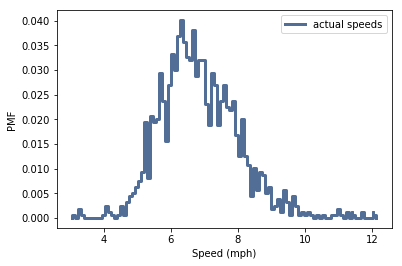

In [49]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [50]:
# Solution goes here

In [51]:
# Solution goes here